In [2]:
%pylab inline

import os
import wradlib as wrl
import pickle
import pandas as pd
import pyart

from mpl_toolkits.axes_grid1 import make_axes_locatable

Populating the interactive namespace from numpy and matplotlib


In [69]:
flist = os.listdir('./')
accum_files = [f for f in flist if f.startswith('gridded_KLOT')]

In [70]:
accum_files

['gridded_KLOT20190927_010000.hdf5',
 'gridded_KLOT20190927_020000.hdf5',
 'gridded_KLOT20190927_030000.hdf5',
 'gridded_KLOT20190927_040000.hdf5',
 'gridded_KLOT20190927_050000.hdf5',
 'gridded_KLOT20190927_060000.hdf5',
 'gridded_KLOT20190927_070000.hdf5',
 'gridded_KLOT20190927_080000.hdf5',
 'gridded_KLOT20190927_090000.hdf5',
 'gridded_KLOT20190927_100000.hdf5',
 'gridded_KLOT20190927_110000.hdf5',
 'gridded_KLOT20190927_120000.hdf5',
 'gridded_KLOT20190927_130000.hdf5',
 'gridded_KLOT20190927_140000.hdf5',
 'gridded_KLOT20190927_150000.hdf5',
 'gridded_KLOT20190927_160000.hdf5',
 'gridded_KLOT20190927_170000.hdf5',
 'gridded_KLOT20190927_180000.hdf5',
 'gridded_KLOT20190927_190000.hdf5',
 'gridded_KLOT20190927_200000.hdf5',
 'gridded_KLOT20190927_210000.hdf5',
 'gridded_KLOT20190927_220000.hdf5',
 'gridded_KLOT20190927_230000.hdf5',
 'gridded_KLOT20190928_000000.hdf5',
 'gridded_KLOT20190928_010000.hdf5',
 'gridded_KLOT20190928_020000.hdf5',
 'gridded_KLOT20190928_030000.hdf5',
 

In [71]:
accum = np.empty((300,300))*0.0
for fn in accum_files:
    data, att = wrl.io.from_hdf5(fn)
    accum+=data

In [81]:
np.nanmax(accum)/25.4

7.621004140118181

In [73]:
# Getting back the objects:
with open('radar_grid.pkl','rb') as f:  # Python 3: open(..., 'rb')
    x_rad, y_rad = pickle.load(f)

In [74]:
# fname_shp = r'C:\Users\irene\Documents\Work\Data\GIS\CHI_shps\chi_watersheds_wgs84.shp'

# dataset, inLayer = wrl.io.open_vector(fname_shp)
# borders, keys = wrl.georef.get_vector_coordinates(inLayer, key='name')

In [75]:
borders_shp_US = r'C:\Users\iac6311\Documents\Work\Data\GIS\USA\states\states_wgs84.shp'

dataset_US, inLayer_US = wrl.io.open_vector(borders_shp_US)
borders_US, keys_US = wrl.georef.get_vector_coordinates(inLayer_US)

In [76]:
# # load CCN gauge locations
# CCN_gauge_locations_fname = 'C:/Users/irene/Documents/Work/Data/Cook_County/CookCounty_gage_locations.csv'

# # df_gauge_loc = pd.read_csv(CCN_gauge_locations_fname,header=0)

# x = df_gauge_loc['Longitude - West'].values
# y = df_gauge_loc['Latitude'].values

In [77]:
df_imptsites = pd.read_csv('C:/Users/iac6311/Documents/Work/Data/importantsites.csv',header=0)

In [78]:
sx = df_imptsites['Longitude']
sy = df_imptsites['Latitude']

In [79]:
jx,jy = -88.1146, 41.4037
ux,uy = -89.0107, 41.4187

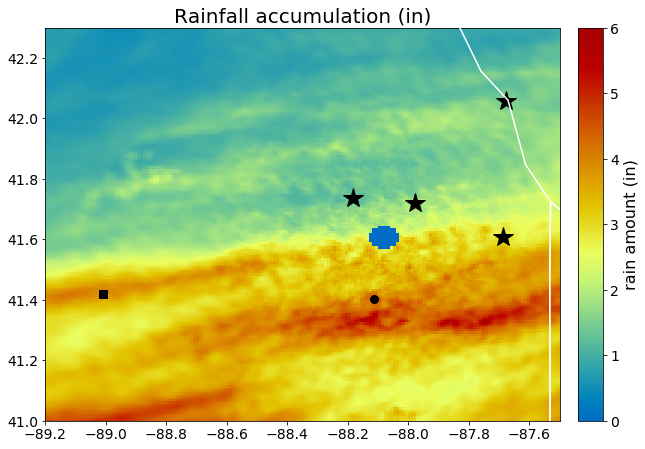

In [83]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, aspect='equal')
pm = ax.pcolormesh(x_rad,y_rad,accum/25.4, vmax=6, cmap=pyart.graph.cm_colorblind.HomeyerRainbow)

plt.plot(jx,jy,'ko', markersize=8)
plt.plot(ux,uy,'ks', markersize=8)
plt.plot(sx,sy,'k*', markersize=20)
wrl.vis.add_lines(ax, borders_US, color='white', lw=1.5, zorder=4)
#wrl.vis.add_lines(ax, borders, color='black', lw=1.5, zorder=10)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.xlim(-89.2,-87.5)
plt.ylim(41.0,42.3)

plt.title('Rainfall accumulation (in)', fontsize=20)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.25)
cb = plt.colorbar(pm, cax=cax)
cb.set_label(label='rain amount (in)', fontsize=16)
cb.ax.tick_params(axis='both', which='major', labelsize=14)


# 